# Réaliser une étude de santé publique 



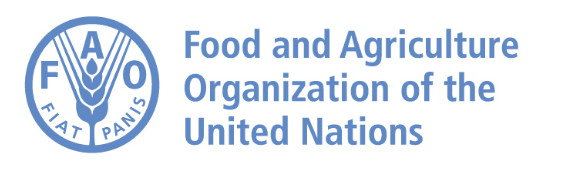




In [2]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import re
import warnings
warnings.filterwarnings('ignore')

# Q1 -  Proportion de personnes en état de sous-nutrition

### Modification du dataframe Sous-nutrition

In [5]:
nutrition = pd.read_csv('sous_nutrition.csv')

In [6]:
nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [7]:
nutrition.dtypes
# problème : valeur est en object au lieu de float

Zone      object
Année     object
Valeur    object
dtype: object

In [8]:
nutrition['Valeur'].unique()
# problème : <.01 ne pourra pas être transformé

array(['8.6', '8.8', '8.9', '9.7', '10.5', '11.1', '2.2', '2.5', '2.8',
       '3', '3.1', '3.3', '0.1', '1.3', '1.2', nan, '7.6', '6.2', '5.3',
       '5.6', '5.8', '5.7', '1.5', '1.6', '1.1', '1.7', '<0.1', '21.7',
       '22.4', '23.3', '22.3', '21.5', '20.9', '0.8', '2', '1.9', '1.8',
       '0.4', '0.5', '0.3', '0.2', '3.2', '3.4', '3.6', '3.8', '2.1',
       '2.3', '2.4', '0.6', '0.7', '0.9', '3.9', '2.7', '1.4', '4.8',
       '4.6', '4.9', '5', '4.4', '4.3', '4.2', '4.5', '26.2', '24.3',
       '21.3', '21.1', '2.9', '5.1', '5.2', '5.4', '203.8', '198.3',
       '193.1', '190.9', '190.1', '189.2', '23.6', '24', '24.1', '3.7',
       '7.3', '7.8', '8.4', '9', '9.1', '10.1', '10', '10.7', '11.5',
       '11.9', '11.8', '8.7', '10.3', '11', '1', '5.5', '6.8', '7.9',
       '5.9', '7', '9.2', '9.4', '9.6', '6.7', '7.1', '7.2', '14.7',
       '17.4', '20.2', '22.2', '22.8', '24.6', '31.1', '28.5', '25.4',
       '24.8', '26.1', '14.5', '15.4', '16.5', '15.8', '15.7', '10.8',
       '

In [9]:
# on remplace <0.1 par 0
nutrition['Valeur'] = nutrition['Valeur'].replace(['<0.1'],'0')

In [10]:
# on change le format
nutrition['Valeur'] = pd.to_numeric(nutrition['Valeur'])

In [11]:
# on travaille sur 2017
nutrition_2017 = nutrition.loc[nutrition['Année']== '2016-2018']

In [12]:
# le format de l'année ne correspond pas à celui de la table population
nutrition_2017 = nutrition_2017.replace(to_replace ="2016-2018", value = "2017")

In [13]:
nutrition_2017['Zone'].unique()
# problème : il y a plusieurs 'Chine'

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Andorre', 'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite',
       'Argentine', 'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan',
       'Bahamas', 'Bahreïn', 'Bangladesh', 'Barbade', 'Bélarus',
       'Belgique', 'Belize', 'Bénin', 'Bermudes', 'Bhoutan',
       'Bolivie (État plurinational de)', 'Bosnie-Herzégovine',
       'Botswana', 'Brésil', 'Brunéi Darussalam', 'Bulgarie',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodge', 'Cameroun',
       'Canada', 'Chili', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chine, continentale',
       'Chine, Taiwan Province de', 'Chypre', 'Colombie', 'Comores',
       'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatie', 'Cuba',
       'Danemark', 'Djibouti', 'Dominique', 'Égypte', 'El Salvador',
       'Émirats arabes unis', 'Équateur', 'Érythrée', 'Espagne',
       'Estonie', 'Eswatini', "États-Unis d'Amérique", 'Éthiopie',
       'Fédératio

In [14]:
# on sélectionne les différentes Chine
nutrition_2017.loc[nutrition_2017['Zone'].str.contains('Chine')]

,Zone,Année,Valeur
226,Chine - RAS de Hong-Kong,2017,NaN
232,Chine - RAS de Macao,2017,0.0
238,"Chine, continentale",2017,NaN
244,"Chine, Taiwan Province de",2017,0.9


In [15]:
# on supprime les doublons Chine
nutrition_2017.drop([226,232,244], inplace = True)

In [16]:
# beaucoup de valeurs non renseignées mettre à 0
nutrition_2017.fillna(0, inplace=True)

In [17]:
# valeur en millions d'habitants alors que dans population valeur est en milliers d'habitant, transformer en milliers
nutrition_2017['Valeur'] = nutrition_2017['Valeur']*1000

In [18]:
# on vérifie le dataframe nutrition_2017
nutrition_2017

,Zone,Année,Valeur
4,Afghanistan,2017,10500.0
10,Afrique du Sud,2017,3100.0
16,Albanie,2017,100.0
22,Algérie,2017,1300.0
28,Allemagne,2017,0.0
...,...,...,...
1192,Venezuela (République bolivarienne du),2017,8000.0
1198,Viet Nam,2017,6500.0
1204,Yémen,2017,0.0
1210,Zambie,2017,0.0


In [19]:
nutrition_2017['Valeur'].sum()
# 535 700 000 d'habitants en sous-nutrition

534800.0

### Modification du dataframe Population

In [20]:
population = pd.read_csv('population.csv')

In [21]:
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [22]:
# on travaille sur l'année 2017
population_2017 = population.loc[population['Année']== 2017]

In [23]:
population_2017['Zone'].unique()
# problème : il y a plusieurs 'Chine'

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Andorre', 'Angola', 'Anguilla', 'Antigua-et-Barbuda',
       'Antilles néerlandaises (ex)', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Aruba', 'Australie', 'Autriche', 'Azerbaïdjan',
       'Bahamas', 'Bahreïn', 'Bangladesh', 'Barbade', 'Bélarus',
       'Belgique', 'Belize', 'Bénin', 'Bermudes', 'Bhoutan',
       'Bolivie (État plurinational de)',
       'Bonaire, Saint-Eustache et Saba', 'Bosnie-Herzégovine',
       'Botswana', 'Brésil', 'Brunéi Darussalam', 'Bulgarie',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodge', 'Cameroun',
       'Canada', 'Chili', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chine, continentale',
       'Chine, Taiwan Province de', 'Chypre', 'Colombie', 'Comores',
       'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatie', 'Cuba',
       'Curaçao', 'Danemark', 'Djibouti', 'Dominique', 'Égypte',
       'El Salvador', 'Émirats arabes unis', 'Équate

In [24]:
# on affiche les différentes Chine
population_2017.loc[population_2017['Zone'].str.contains('Chine')]

,Zone,Année,Valeur
250,Chine - RAS de Hong-Kong,2017,7306.322
256,Chine - RAS de Macao,2017,622.585
262,"Chine, continentale",2017,1421021.791
268,"Chine, Taiwan Province de",2017,23674.546


In [25]:
# on supprime les doublons chine
population_2017.drop([250, 256,268], inplace = True)

In [26]:
# on vérifie le dataframe population_2017
population_2017

,Zone,Année,Valeur
4,Afghanistan,2017,36296.113
10,Afrique du Sud,2017,57009.756
16,Albanie,2017,2884.169
22,Algérie,2017,41389.189
28,Allemagne,2017,82658.409
...,...,...,...
1390,Venezuela (République bolivarienne du),2017,29402.484
1396,Viet Nam,2017,94600.648
1402,Yémen,2017,27834.819
1408,Zambie,2017,16853.599


In [27]:
population_2017['Valeur'].sum()
# 7 516 530 658 d'habitants

7516530.658

In [28]:
calcul_1=round(nutrition_2017['Valeur'].sum()/population_2017['Valeur'].sum()*100, 2)
# 7.11%

### REPONSE - Q1 : Calcul de la proportion de personne en sous-nutrition

In [29]:
print("La proportion de personnes en état de sous-nutrition est de :", calcul_1,"%")

La proportion de personnes en état de sous-nutrition est de : 7.11 %


# Q2 - Nombre théorique de personne pouvant être nourries

### Modification du dataframe disponibilite

In [30]:
disponibilite = pd.read_csv('dispo_alimentaire.csv')

In [31]:
disponibilite.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [32]:
disponibilite['Zone'].unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas',
       'Bangladesh', 'Barbade', 'Belgique', 'Belize', 'Bermudes',
       'Bolivie (État plurinational de)', 'Bosnie-Herzégovine',
       'Botswana', 'Brunéi Darussalam', 'Brésil', 'Bulgarie',
       'Burkina Faso', 'Bélarus', 'Bénin', 'Cabo Verde', 'Cambodge',
       'Cameroun', 'Canada', 'Chili', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chine, Taiwan Province de',
       'Chine, continentale', 'Chypre', 'Colombie', 'Congo', 'Costa Rica',
       'Croatie', 'Cuba', "Côte d'Ivoire", 'Danemark', 'Djibouti',
       'Dominique', 'El Salvador', 'Espagne', 'Estonie', 'Eswatini',
       'Fidji', 'Finlande', 'France', 'Fédération de Russie', 'Gabon',
       'Gambie', 'Ghana', 'Grenade', 'Grèce', 'Guatemala', 'Guinée',
       'Guinée-Bissau', 'Guyana', 'Géorgie', 'H

In [33]:
disponibilite_2017 = disponibilite

In [34]:
# on affiche les différentes 'Chine'
disponibilite_2017.loc[disponibilite['Zone']=="Chine - RAS de Hong-Kong"]

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
2992,Chine - RAS de Hong-Kong,Abats Comestible,animale,NaN,63.0,81.0,26.77,2.25,13.27,256.0,430.0,674.0,193.0,NaN,12.0,NaN,NaN,NaN
2993,Chine - RAS de Hong-Kong,"Agrumes, Autres",vegetale,NaN,NaN,0.0,0.32,0.00,0.00,2.0,0.0,3.0,2.0,0.0,NaN,NaN,NaN,0.0
2994,Chine - RAS de Hong-Kong,"Alcool, non Comestible",vegetale,NaN,1.0,NaN,NaN,NaN,NaN,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2995,Chine - RAS de Hong-Kong,Aliments pour enfants,vegetale,NaN,NaN,0.0,0.05,0.00,0.02,0.0,1.0,2.0,0.0,0.0,NaN,NaN,NaN,0.0
2996,Chine - RAS de Hong-Kong,Ananas,vegetale,NaN,1.0,2.0,1.53,0.01,0.02,13.0,14.0,28.0,11.0,2.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3083,Chine - RAS de Hong-Kong,Viande de Suides,animale,NaN,17.0,445.0,67.11,41.02,17.43,500.0,175.0,552.0,483.0,NaN,124.0,NaN,NaN,0.0
3084,Chine - RAS de Hong-Kong,Viande de Volailles,animale,NaN,53.0,197.0,54.86,12.58,19.58,449.0,806.0,1186.0,395.0,NaN,28.0,NaN,NaN,40.0
3085,Chine - RAS de Hong-Kong,"Viande, Autre",animale,NaN,1.0,12.0,3.11,0.63,1.56,24.0,2.0,18.0,22.0,NaN,8.0,NaN,NaN,0.0
3086,Chine - RAS de Hong-Kong,Vin,vegetale,NaN,1.0,8.0,4.24,NaN,NaN,32.0,19.0,50.0,31.0,NaN,NaN,NaN,NaN,0.0


In [35]:
disponibilite_2017.loc[disponibilite['Zone']=="Chine - RAS de Macao"]

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
3088,Chine - RAS de Macao,Abats Comestible,animale,NaN,NaN,15.0,4.84,0.40,2.43,3.0,0.0,2.0,3.0,NaN,0.0,NaN,NaN,NaN
3089,Chine - RAS de Macao,"Agrumes, Autres",vegetale,NaN,NaN,0.0,0.45,NaN,0.00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3090,Chine - RAS de Macao,"Alcool, non Comestible",vegetale,NaN,1.0,NaN,NaN,NaN,NaN,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3091,Chine - RAS de Macao,Aliments pour enfants,vegetale,NaN,NaN,44.0,4.37,0.35,1.82,2.0,0.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3092,Chine - RAS de Macao,Ananas,vegetale,NaN,NaN,3.0,2.90,0.01,0.01,2.0,0.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3174,Chine - RAS de Macao,Viande de Suides,animale,NaN,1.0,423.0,71.48,37.84,18.80,41.0,0.0,33.0,40.0,NaN,8.0,NaN,NaN,0.0
3175,Chine - RAS de Macao,Viande de Volailles,animale,NaN,0.0,145.0,36.26,10.33,12.04,21.0,0.0,17.0,21.0,NaN,4.0,NaN,NaN,NaN
3176,Chine - RAS de Macao,"Viande, Autre",animale,NaN,NaN,2.0,0.59,0.02,0.49,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0
3177,Chine - RAS de Macao,Vin,vegetale,NaN,0.0,22.0,11.60,NaN,NaN,7.0,0.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [36]:
disponibilite_2017.loc[disponibilite['Zone']=="Chine, Taiwan Province de"]

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
3179,"Chine, Taiwan Province de",Abats Comestible,animale,50.0,NaN,10.0,3.22,0.32,1.60,125.0,0.0,27.0,75.0,NaN,98.0,NaN,NaN,NaN
3180,"Chine, Taiwan Province de","Agrumes, Autres",vegetale,NaN,NaN,2.0,2.70,0.01,0.03,68.0,3.0,1.0,63.0,4.0,70.0,NaN,2.0,0.0
3181,"Chine, Taiwan Province de","Alcool, non Comestible",vegetale,NaN,84.0,NaN,NaN,NaN,NaN,84.0,0.0,84.0,NaN,NaN,NaN,NaN,NaN,NaN
3182,"Chine, Taiwan Province de",Aliments pour enfants,vegetale,NaN,NaN,4.0,0.36,0.03,0.15,8.0,0.0,9.0,8.0,NaN,NaN,NaN,NaN,0.0
3183,"Chine, Taiwan Province de",Ananas,vegetale,NaN,0.0,14.0,15.38,0.08,0.09,399.0,5.0,14.0,359.0,40.0,390.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3268,"Chine, Taiwan Province de",Viande de Suides,animale,NaN,2.0,276.0,39.37,25.08,11.77,920.0,3.0,37.0,918.0,NaN,887.0,NaN,0.0,NaN
3269,"Chine, Taiwan Province de",Viande de Volailles,animale,NaN,0.0,124.0,32.13,8.72,10.69,750.0,7.0,116.0,750.0,NaN,642.0,NaN,NaN,NaN
3270,"Chine, Taiwan Province de","Viande, Autre",animale,NaN,NaN,0.0,0.07,0.01,0.02,2.0,0.0,1.0,2.0,NaN,1.0,NaN,NaN,NaN
3271,"Chine, Taiwan Province de",Vin,vegetale,NaN,NaN,1.0,0.71,NaN,NaN,16.0,0.0,17.0,16.0,NaN,NaN,NaN,NaN,0.0


In [37]:
# on supprime les doublons de la Chine
disponibilite_2017.drop(disponibilite_2017.index[range(2992, 3273)], inplace=True)

In [38]:
# on vérifie
disponibilite_2017.loc[disponibilite_2017['Zone'].str.contains('Chine')]

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
3273,"Chine, continentale",Abats Comestible,animale,NaN,26.0,10.0,3.44,0.33,1.69,4797.0,10.0,836.0,4771.0,NaN,3970.0,NaN,NaN,NaN
3274,"Chine, continentale","Agrumes, Autres",vegetale,NaN,NaN,2.0,3.23,0.02,0.04,4481.0,4.0,18.0,4481.0,NaN,4468.0,NaN,NaN,NaN
3275,"Chine, continentale","Alcool, non Comestible",vegetale,NaN,154.0,NaN,NaN,NaN,NaN,154.0,46.0,0.0,NaN,NaN,200.0,NaN,NaN,NaN
3276,"Chine, continentale",Aliments pour enfants,vegetale,NaN,NaN,1.0,0.09,0.01,0.04,121.0,0.0,122.0,121.0,NaN,NaN,NaN,NaN,0.0
3277,"Chine, continentale",Ananas,vegetale,NaN,NaN,1.0,0.98,0.00,0.01,1431.0,42.0,87.0,1351.0,71.0,1386.0,NaN,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3364,"Chine, continentale",Viande de Suides,animale,NaN,NaN,369.0,38.43,35.41,11.58,53268.0,279.0,815.0,53247.0,NaN,52733.0,NaN,21.0,0.0
3365,"Chine, continentale",Viande de Volailles,animale,NaN,NaN,63.0,13.20,4.94,4.26,18285.0,564.0,584.0,18284.0,NaN,18265.0,NaN,2.0,NaN
3366,"Chine, continentale","Viande, Autre",animale,1.0,NaN,4.0,1.18,0.16,0.58,1635.0,19.0,2.0,1635.0,NaN,1653.0,NaN,0.0,0.0
3367,"Chine, continentale",Vin,vegetale,NaN,NaN,3.0,1.50,NaN,0.00,2075.0,3.0,378.0,2075.0,NaN,1700.0,NaN,NaN,NaN


In [39]:
disponibilite_2017.isna().mean()

Zone                                                             0.000000
Produit                                                          0.000000
Origine                                                          0.000000
Aliments pour animaux                                            0.825829
Autres Utilisations                                              0.651201
Disponibilité alimentaire (Kcal/personne/jour)                   0.087836
Disponibilité alimentaire en quantité (kg/personne/an)           0.102258
Disponibilité de matière grasse en quantité (g/personne/jour)    0.244845
Disponibilité de protéines en quantité (g/personne/jour)         0.259919
Disponibilité intérieure                                         0.014161
Exportations - Quantité                                          0.219329
Importations - Quantité                                          0.048617
Nourriture                                                       0.102258
Pertes                                

In [40]:
# on remplace les valeurs manquantes
disponibilite_2017.fillna(0, inplace=True)

### Calcul du nombre théorique de personnes pouvant être nourries à partir de la disponibilité alimentaire mondiale

Il faut connaître pour chaque pays la disponibilité calorique par jour = disponibilité alimentaire(en kcal/pers) x nb d'habitant de chaque pays et en faire la somme. On aura alors la disponibilité calorique mondiale. Si on considère un apport calorique moyen de 2000 kcal/jour/pers. On calcule alors le nombre théorique de personnes pouvant être nourries en divisant la disponibilité calorique mondiale par l'apport calorique moyen.

In [41]:
# on réalise une jointure entre les  dataframe nutrition et population
dispo_par_pers =pd.merge(disponibilite_2017, population_2017, on = 'Zone', how = 'right')

In [42]:
# on ne garde que les colonnes 'disponibilité alimentaire'
dispo_par_pers.drop(columns=["Aliments pour animaux","Autres Utilisations","Exportations - Quantité", "Importations - Quantité", "Nourriture", "Pertes", "Production", "Semences","Traitement","Variation de stock","Année"], inplace=True)

In [43]:
dispo_par_pers.rename(columns = {'Valeur':'Population'}, inplace=True)

In [44]:
dispo_par_pers
# problème : population exprimée en milliers d'habitants

,Zone,Produit,Origine,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Population
0,Afghanistan,Abats Comestible,animale,5.0,1.72,0.20,0.77,53.0,36296.113
1,Afghanistan,"Agrumes, Autres",vegetale,1.0,1.29,0.01,0.02,41.0,36296.113
2,Afghanistan,Aliments pour enfants,vegetale,1.0,0.06,0.01,0.03,2.0,36296.113
3,Afghanistan,Ananas,vegetale,0.0,0.00,0.00,0.00,0.0,36296.113
4,Afghanistan,Bananes,vegetale,4.0,2.70,0.02,0.05,82.0,36296.113
...,...,...,...,...,...,...,...,...,...
15194,Zimbabwe,Viande de Suides,animale,24.0,2.65,2.25,0.83,37.0,14236.595
15195,Zimbabwe,Viande de Volailles,animale,17.0,4.97,1.05,1.69,70.0,14236.595
15196,Zimbabwe,"Viande, Autre",animale,7.0,2.29,0.21,1.12,34.0,14236.595
15197,Zimbabwe,Vin,vegetale,1.0,0.27,0.00,0.00,4.0,14236.595


In [45]:
# on change l'unité de 'Population'
dispo_par_pers.loc[:, 'Population'] = dispo_par_pers.loc[:, 'Population'] *1000             

In [46]:
# on calcule le disponibilité calorique pour chaque pays
dispo_par_pers['dispo_kcal (kcal/jour)'] = dispo_par_pers['Disponibilité alimentaire (Kcal/personne/jour)'] * dispo_par_pers['Population']

In [47]:
dispo_par_pers

,Zone,Produit,Origine,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Population,dispo_kcal (kcal/jour)
0,Afghanistan,Abats Comestible,animale,5.0,1.72,0.20,0.77,53.0,36296113.0,181480565.0
1,Afghanistan,"Agrumes, Autres",vegetale,1.0,1.29,0.01,0.02,41.0,36296113.0,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,1.0,0.06,0.01,0.03,2.0,36296113.0,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.00,0.00,0.00,0.0,36296113.0,0.0
4,Afghanistan,Bananes,vegetale,4.0,2.70,0.02,0.05,82.0,36296113.0,145184452.0
...,...,...,...,...,...,...,...,...,...,...
15194,Zimbabwe,Viande de Suides,animale,24.0,2.65,2.25,0.83,37.0,14236595.0,341678280.0
15195,Zimbabwe,Viande de Volailles,animale,17.0,4.97,1.05,1.69,70.0,14236595.0,242022115.0
15196,Zimbabwe,"Viande, Autre",animale,7.0,2.29,0.21,1.12,34.0,14236595.0,99656165.0
15197,Zimbabwe,Vin,vegetale,1.0,0.27,0.00,0.00,4.0,14236595.0,14236595.0


In [48]:
# je vérifie le chiffre de la population mondiale : 7 516 530 658 habitants
dispo_par_pers['Population'].unique().sum()

7516530658.0

In [49]:
# la somme donne la disponibilité calorique mondiale en kcal/jour 
dispo_par_pers['dispo_kcal (kcal/jour)'].sum()

20822184929056.0

In [50]:
# Nombre théorique de personnes pouvant être nourries
nb_theorique = round(dispo_par_pers['dispo_kcal (kcal/jour)'].sum()/(2000))
nb_theorique
# 10 411 092 465 habitants

10411092465

### REPONSE - Q2 : Nombre théorique de personnes pouvant être nourries

In [51]:
print("Nombre théorique de personnes pouvant être nourries :", nb_theorique, "habitants")
# 8 328 874 000 habitants si apport calorique moyen 2500 kcal/jour

Nombre théorique de personnes pouvant être nourries : 10411092465 habitants


# Q3 - Calcul du nombre théorique de personnes pouvant être nourries à partir de la disponibilité alimentaire en végétaux¶

In [52]:
dispo_par_pers_veg=dispo_par_pers[dispo_par_pers['Origine']=='vegetale']                            

In [53]:
dispo_par_pers_veg

,Zone,Produit,Origine,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Population,dispo_kcal (kcal/jour)
1,Afghanistan,"Agrumes, Autres",vegetale,1.0,1.29,0.01,0.02,41.0,36296113.0,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,1.0,0.06,0.01,0.03,2.0,36296113.0,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.00,0.00,0.00,0.0,36296113.0,0.0
4,Afghanistan,Bananes,vegetale,4.0,2.70,0.02,0.05,82.0,36296113.0,145184452.0
6,Afghanistan,Bière,vegetale,0.0,0.09,0.00,0.00,3.0,36296113.0,0.0
...,...,...,...,...,...,...,...,...,...,...
15189,Zimbabwe,Sésame,vegetale,0.0,0.00,0.00,0.00,0.0,14236595.0,0.0
15190,Zimbabwe,Thé,vegetale,1.0,0.54,0.00,0.15,8.0,14236595.0,14236595.0
15191,Zimbabwe,Tomates,vegetale,1.0,1.80,0.01,0.04,27.0,14236595.0,14236595.0
15197,Zimbabwe,Vin,vegetale,1.0,0.27,0.00,0.00,4.0,14236595.0,14236595.0


In [54]:
dispo_par_pers_veg['dispo_kcal (kcal/jour)'].sum()

17189680423014.0

In [55]:
# Nombre théorique de personnes pouvant être nourries en végétaux
nb_theorique_veg = round(dispo_par_pers_veg['dispo_kcal (kcal/jour)'].sum()/(2000))
nb_theorique_veg
# 8 594 840 212 habitants

8594840212

### REPONSE - Q3 : Nombre théorique de personnes pouvant être nourries en produits végétaux

In [56]:
print("Nombre théorique de personnes pouvant être nourries :", nb_theorique_veg, "habitants")
# 6 875 872 169 habitants si apport calorique moyen 2500 kcal/jour

Nombre théorique de personnes pouvant être nourries : 8594840212 habitants


# Q4 - Utilisation de la disponibilité intérieure

Importations + Production + Variation de stock - Exportations = Disponibilité intérieure = Nourriture + Aliments pour animaux + Semences + Pertes + Traitement + Autres Utilisations

Solde = Disponibilité = Utilisé

In [57]:
# je supprime les colonnes qui ne sont pas en milliers de tonne
dispo_interieure=disponibilite_2017.drop(columns=["Disponibilité alimentaire (Kcal/personne/jour)","Disponibilité alimentaire en quantité (kg/personne/an)", "Disponibilité de matière grasse en quantité (g/personne/jour)", "Disponibilité de protéines en quantité (g/personne/jour)"])

In [58]:
# vérification équation
verif=dispo_interieure 
verif['Solde']=verif['Importations - Quantité']+verif['Production']-verif['Exportations - Quantité']+verif['Variation de stock']
verif['Utilisé']=verif['Nourriture']+verif['Aliments pour animaux']+verif['Semences']+verif['Pertes']+verif['Traitement']+verif['Autres Utilisations']
verif[['Zone','Solde','Disponibilité intérieure','Utilisé']].loc[verif['Variation de stock']== -20].head(5) 

,Zone,Solde,Disponibilité intérieure,Utilisé
88,Afrique du Sud,68.0,68.0,68.0
204,Albanie,420.0,420.0,420.0
668,Arabie saoudite,27.0,28.0,28.0
2303,Burkina Faso,49.0,49.0,49.0
2721,Cameroun,532.0,532.0,532.0


In [59]:
dispo_interieure.fillna(0, inplace=True)

In [60]:
dispo_interieure

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Solde,Utilisé
0,Afghanistan,Abats Comestible,animale,0.0,0.0,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0,53.0,53.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0,41.0,41.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0,82.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,0.0,0.0,3.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,2.0,3.0
15601,Îles Salomon,Viande de Volailles,animale,0.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
15602,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


On effectue les calculs de proportion à partir du dataframe

In [61]:
part_anim=round(dispo_interieure['Aliments pour animaux'].sum()*100/dispo_interieure['Disponibilité intérieure'].sum(),2)

In [62]:
part_nourr=round(dispo_interieure['Nourriture'].sum()*100/dispo_interieure['Disponibilité intérieure'].sum(),2)

In [63]:
part_pertes=round(dispo_interieure['Pertes'].sum()*100/dispo_interieure['Disponibilité intérieure'].sum(),2)

In [64]:
part_sem=round(dispo_interieure['Semences'].sum()*100/dispo_interieure['Disponibilité intérieure'].sum(),2)

In [65]:
part_trait=round(dispo_interieure['Traitement'].sum()*100/dispo_interieure['Disponibilité intérieure'].sum(),2)

In [66]:
part_autres=round(dispo_interieure['Autres Utilisations'].sum()*100/dispo_interieure['Disponibilité intérieure'].sum(),2)

### REPONSE - Q4 : calcul de la moyenne de ces proportions

In [67]:
print(part_anim,"% de la disponibilité intérieure est attribuée à l'alimentation animale")

13.23 % de la disponibilité intérieure est attribuée à l'alimentation animale


In [68]:
print(part_nourr,"% de la disponibilité intérieure est utilisée pour à l'alimentation humaine.")

49.46 % de la disponibilité intérieure est utilisée pour à l'alimentation humaine.


In [69]:
print(part_pertes,"% de la disponibilité intérieure est perdue.")

4.61 % de la disponibilité intérieure est perdue.


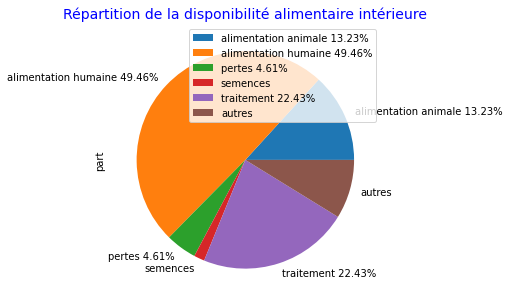

In [70]:
graphe2 = pd.DataFrame({'part': [part_anim, part_nourr, part_pertes, part_sem, part_trait, part_autres]},index=['alimentation animale 13.23%', 'alimentation humaine 49.46%', 'pertes 4.61%', 'semences', 'traitement 22.43%', 'autres'])
plot = graphe2.plot.pie(y='part', figsize=(5,5))
plt.title("Répartition de la disponibilité alimentaire intérieure", color='blue', fontsize=14);

# Q5 - Pays où la proportion de personnes sous-alimentées est la plus forte

### Proportion de la population en sous-nutrition par pays

On a besoin d'un dataframe contenant le nombre de personne en sous nutrition et la population totale de chaque pays. Pour cela il faut fusionner nutrition_2017 et population_2017.

In [70]:
# on réalise une jointure entre les  dataframe nutrition et population
proportion =pd.merge(nutrition_2017, population_2017, on = 'Zone', how = 'right')

In [71]:
proportion

,Zone,Année_x,Valeur_x,Année_y,Valeur_y
0,Afghanistan,2017,10500.0,2017,36296.113
1,Afrique du Sud,2017,3100.0,2017,57009.756
2,Albanie,2017,100.0,2017,2884.169
3,Algérie,2017,1300.0,2017,41389.189
4,Allemagne,2017,0.0,2017,82658.409
...,...,...,...,...,...
228,Venezuela (République bolivarienne du),2017,8000.0,2017,29402.484
229,Viet Nam,2017,6500.0,2017,94600.648
230,Yémen,2017,0.0,2017,27834.819
231,Zambie,2017,0.0,2017,16853.599


In [72]:
# Y-a-t-il des valeurs manquantes ?
proportion.isna().sum()

Zone         0
Année_x     33
Valeur_x    33
Année_y      0
Valeur_y     0
dtype: int64

In [73]:
# on supprime les valeurs non renseignées
proportion_0NA = proportion.dropna()

In [74]:
proportion_0NA

,Zone,Année_x,Valeur_x,Année_y,Valeur_y
0,Afghanistan,2017,10500.0,2017,36296.113
1,Afrique du Sud,2017,3100.0,2017,57009.756
2,Albanie,2017,100.0,2017,2884.169
3,Algérie,2017,1300.0,2017,41389.189
4,Allemagne,2017,0.0,2017,82658.409
...,...,...,...,...,...
228,Venezuela (République bolivarienne du),2017,8000.0,2017,29402.484
229,Viet Nam,2017,6500.0,2017,94600.648
230,Yémen,2017,0.0,2017,27834.819
231,Zambie,2017,0.0,2017,16853.599


In [75]:
# on supprime les colonnes Année_x et Année_y
proportion_0NA.drop(columns=["Année_x","Année_y"], inplace=True)

In [76]:
# on renomme les colonnes
proportion_0NA.rename(columns={"Valeur_x":"sous_nutrition", "Valeur_y":"population_totale"}, inplace = True)

In [77]:
# calcul de la proportion dans une nouvelle colonne
proportion_0NA['pourcentage'] = proportion_0NA['sous_nutrition']/proportion_0NA['population_totale']*100

In [78]:
proportion_0NA

,Zone,sous_nutrition,population_totale,pourcentage
0,Afghanistan,10500.0,36296.113,28.928718
1,Afrique du Sud,3100.0,57009.756,5.437666
2,Albanie,100.0,2884.169,3.467203
3,Algérie,1300.0,41389.189,3.140917
4,Allemagne,0.0,82658.409,0.000000
...,...,...,...,...
228,Venezuela (République bolivarienne du),8000.0,29402.484,27.208586
229,Viet Nam,6500.0,94600.648,6.870989
230,Yémen,0.0,27834.819,0.000000
231,Zambie,0.0,16853.599,0.000000


### REPONSE - Q5 : Pays où la proportion de personnes sous alimentées est la plus forte

In [79]:
# 15 pays où la proportion est la plus forte
proportion_0NA.sort_values('pourcentage', ascending=False).head(15)

,Zone,sous_nutrition,population_totale,pourcentage
84,Haïti,5300.0,10982.366,48.259182
178,République populaire démocratique de Corée,12000.0,25429.825,47.188685
125,Madagascar,10500.0,25570.512,41.062924
119,Libéria,1800.0,4702.226,38.279742
116,Lesotho,800.0,2091.534,38.249438
213,Tchad,5700.0,15016.753,37.957606
183,Rwanda,4200.0,11980.961,35.055619
142,Mozambique,9400.0,28649.018,32.810898
216,Timor-Leste,400.0,1243.258,32.173531
0,Afghanistan,10500.0,36296.113,28.928718


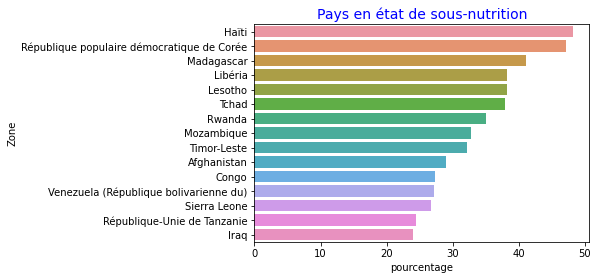

In [80]:
graphe1=proportion_0NA.sort_values('pourcentage', ascending=False).head(15)
sns.barplot(x ='pourcentage' , y = 'Zone', data = graphe1)
plt.title("Pays en état de sous-nutrition", color='blue', fontsize=14);

# Q6- Les pays qui ont bénéficié le plus d'aide depuis 2013

In [81]:
aide = pd.read_csv('aide_alimentaire.csv')

In [82]:
aide.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [83]:
aide_total=aide.drop(columns=["Année","Produit"])
# on supprime les colonnes Année et Produit

In [84]:
# on renomme la colonne 'valeur'
aide_total.rename(columns = {'Valeur':'Aide'}, inplace=True)

### REPONSE - Q6 : pays ayant reçus le plus d'aide depuis 2013

In [85]:
# Top 20 des pays 
aide_total.groupby('Pays bénéficiaire').sum().sort_values('Aide', ascending=False).head(20)
# 1 858 943 tonnes pour la Syrie

,Aide
Pays bénéficiaire,
République arabe syrienne,1858943
Éthiopie,1381294
Yémen,1206484
Soudan du Sud,695248
Soudan,669784
Kenya,552836
Bangladesh,348188
Somalie,292678
République démocratique du Congo,288502


# Q7- Les pays ayant le plus / le moins de disponibilité par habitant

### Création d'un tableau disponibilité alimentaire par pays

In [86]:
dispo_par_pays=disponibilite_2017.pivot_table(['Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité alimentaire en quantité (kg/personne/an)', 'Disponibilité de matière grasse en quantité (g/personne/jour)','Disponibilité de protéines en quantité (g/personne/jour)'], ["Zone"], aggfunc='sum')

In [87]:
dispo_par_pays

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
Zone,,,,
Afghanistan,2087.0,351.41,33.50,58.26
Afrique du Sud,3020.0,564.80,83.58,85.33
Albanie,3188.0,1095.54,106.48,111.37
Algérie,3293.0,809.13,76.48,91.92
Allemagne,3503.0,957.52,141.62,101.39
...,...,...,...,...
Émirats arabes unis,3275.0,700.24,87.16,104.51
Équateur,2346.0,544.91,94.64,61.30
États-Unis d'Amérique,3682.0,1002.39,161.37,109.42


### REPONSE - Q7 : les pays ayant le plus / le moins de disponibilité alimentaire

In [88]:
dispo_par_pays.sort_values('Disponibilité alimentaire (Kcal/personne/jour)').head(10)

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
Zone,,,,
République centrafricaine,1879.0,453.73,59.41,46.04
Zambie,1924.0,350.12,42.05,55.22
Madagascar,2056.0,425.07,24.49,46.69
Afghanistan,2087.0,351.41,33.50,58.26
Haïti,2089.0,397.78,48.92,47.70
République populaire démocratique de Corée,2093.0,458.93,36.41,54.99
Tchad,2109.0,319.45,47.10,62.75
Zimbabwe,2113.0,336.59,57.18,48.32
Ouganda,2126.0,535.58,46.57,52.64


In [89]:
dispo_par_pays.sort_values('Disponibilité alimentaire (Kcal/personne/jour)', ascending=False).head(10)

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
Zone,,,,
Autriche,3770.0,1069.20,170.44,106.20
Belgique,3737.0,1002.09,161.95,99.37
Turquie,3708.0,968.15,119.64,108.12
États-Unis d'Amérique,3682.0,1002.39,161.37,109.42
Israël,3610.0,922.14,151.39,128.00
Irlande,3602.0,1150.15,125.69,109.91
Italie,3578.0,993.20,154.69,108.49
Luxembourg,3540.0,1150.66,141.49,113.64
Égypte,3518.0,803.79,63.09,103.22


# Q8 - Informations permettant la mise en relief des pays en difficulté alimentaire

##  1- Besoins des populations fragilisées
### Population ayant un déficit alimentaire

On admet que les apports journaliers **moyens** sont de 2500 kcal/jour en moyenne

In [90]:
dispo_par_pays.loc[dispo_par_pays['Disponibilité alimentaire (Kcal/personne/jour)']<2500].sort_values('Disponibilité alimentaire (Kcal/personne/jour)')

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
Zone,,,,
République centrafricaine,1879.0,453.73,59.41,46.04
Zambie,1924.0,350.12,42.05,55.22
Madagascar,2056.0,425.07,24.49,46.69
Afghanistan,2087.0,351.41,33.50,58.26
Haïti,2089.0,397.78,48.92,47.70
République populaire démocratique de Corée,2093.0,458.93,36.41,54.99
Tchad,2109.0,319.45,47.10,62.75
Zimbabwe,2113.0,336.59,57.18,48.32
Ouganda,2126.0,535.58,46.57,52.64


In [91]:
nb_de_pays_deficit_alim=len(dispo_par_pays.loc[dispo_par_pays['Disponibilité alimentaire (Kcal/personne/jour)']<2500].sort_values('Disponibilité alimentaire (Kcal/personne/jour)'))
print(nb_de_pays_deficit_alim, "pays sur 233 ont un déficit alimentaire")

42 pays sur 233 ont un déficit alimentaire


On admet que les apports journaliers **minimums** sont de 2000 kcal/jour en moyenne
L'équilibre alimentaire se décompose comme suit :
* 15% de protéines apportant 300 kcal soit 75g
* 50% de glucides apportant 1000 kcal soit 250g
* 35% de lipides apportant 700 kcal soit 78g

### Calcul de la disponibilité en protéine par habitant par jour et par pays

In [92]:
dispo_proteines=disponibilite_2017.groupby('Zone')[['Disponibilité de protéines en quantité (g/personne/jour)']].sum()
dispo_proteines.loc[dispo_proteines['Disponibilité de protéines en quantité (g/personne/jour)']<75].sort_values('Disponibilité de protéines en quantité (g/personne/jour)')

,Disponibilité de protéines en quantité (g/personne/jour)
Zone,
Libéria,37.66
Guinée-Bissau,44.05
Mozambique,45.68
République centrafricaine,46.04
Madagascar,46.69
...,...
Kiribati,73.34
Lesotho,73.48
Fidji,73.53


In [93]:
nb_de_pays_carence_prot=len(dispo_proteines.loc[dispo_proteines['Disponibilité de protéines en quantité (g/personne/jour)']<75])
print(nb_de_pays_carence_prot, "pays sur 233 ont une disponibilité journalière en protéines insuffisante")

72 pays sur 233 ont une disponibilité journalière en protéines insuffisante


### Calcul de la disponibilité en lipides par habitant par jour et par pays

In [94]:
dispo_lipides=disponibilite_2017.groupby('Zone')[['Disponibilité de matière grasse en quantité (g/personne/jour)']].sum()
dispo_lipides.loc[dispo_lipides['Disponibilité de matière grasse en quantité (g/personne/jour)']<78].sort_values('Disponibilité de matière grasse en quantité (g/personne/jour)')

,Disponibilité de matière grasse en quantité (g/personne/jour)
Zone,
Rwanda,23.77
Madagascar,24.49
Éthiopie,25.89
Bangladesh,29.92
Lesotho,32.26
...,...
Dominique,75.49
Belize,75.61
Algérie,76.48


In [95]:
nb_de_pays_carence_lip=len(dispo_lipides.loc[dispo_lipides['Disponibilité de matière grasse en quantité (g/personne/jour)']<78].sort_values('Disponibilité de matière grasse en quantité (g/personne/jour)'))
print(nb_de_pays_carence_lip, "pays sur 233 ont une disponibilité journalière en matière grasse insuffisante")

80 pays sur 233 ont une disponibilité journalière en matière grasse insuffisante


## 2 - Etude des ressources nutritionnelles
### Apport énergétique

In [96]:
ressources=disponibilite_2017[['Zone', 'Produit', 'Origine', 'Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité alimentaire en quantité (kg/personne/an)','Disponibilité de matière grasse en quantité (g/personne/jour)','Disponibilité de protéines en quantité (g/personne/jour)',]]
ressources['Pouvoir énergétique (kcal/kg)']=ressources['Disponibilité alimentaire (Kcal/personne/jour)']*365/ressources['Disponibilité alimentaire en quantité (kg/personne/an)']
ressources['Apport protéique (%)']=ressources['Disponibilité de protéines en quantité (g/personne/jour)']/(ressources['Disponibilité alimentaire en quantité (kg/personne/an)']*1000/365)*100
ressources

,Zone,Produit,Origine,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Pouvoir énergétique (kcal/kg),Apport protéique (%)
0,Afghanistan,Abats Comestible,animale,5.0,1.72,0.20,0.77,1061.046512,16.340116
1,Afghanistan,"Agrumes, Autres",vegetale,1.0,1.29,0.01,0.02,282.945736,0.565891
2,Afghanistan,Aliments pour enfants,vegetale,1.0,0.06,0.01,0.03,6083.333333,18.250000
3,Afghanistan,Ananas,vegetale,0.0,0.00,0.00,0.00,NaN,NaN
4,Afghanistan,Bananes,vegetale,4.0,2.70,0.02,0.05,540.740741,0.675926
...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,45.0,4.70,4.28,1.41,3494.680851,10.950000
15601,Îles Salomon,Viande de Volailles,animale,11.0,3.34,0.69,1.14,1202.095808,12.458084
15602,Îles Salomon,"Viande, Autre",animale,0.0,0.06,0.00,0.04,0.000000,24.333333
15603,Îles Salomon,Vin,vegetale,0.0,0.07,0.00,0.00,0.000000,0.000000


In [97]:
pouvoir_energetique_produit=ressources[['Zone','Produit','Pouvoir énergétique (kcal/kg)']].copy()
pouvoir_energetique_produit.dropna()
pouvoir_energetique_produit=pouvoir_energetique_produit.loc[pouvoir_energetique_produit['Pouvoir énergétique (kcal/kg)']>0]
pouvoir_energetique_produit=pouvoir_energetique_produit.groupby('Produit').mean()[['Pouvoir énergétique (kcal/kg)']].sort_values(['Pouvoir énergétique (kcal/kg)'],ascending=False)
pouvoir_energetique_produit.head().reset_index()

,Produit,Pouvoir énergétique (kcal/kg)
0,Huiles de Foie de Poisso,11809.003531
1,Huile d'Olive,9301.823385
2,Huile de Germe de Maïs,9263.661005
3,Huile de Son de Riz,9206.134101
4,Huile de Colza&Moutarde,9158.881197


Le maïs est en 33ème position

### Apport protéique

In [98]:
apport_proteique_produit=ressources[['Zone','Produit','Apport protéique (%)']].copy()
apport_proteique_produit.dropna()
apport_proteique_produit=apport_proteique_produit.loc[apport_proteique_produit['Apport protéique (%)']>0]
apport_proteique_produit=apport_proteique_produit.groupby('Produit').mean()[['Apport protéique (%)']].sort_values(['Apport protéique (%)'],ascending=False)
apport_proteique_produit.head().reset_index()

,Produit,Apport protéique (%)
0,Graines Colza/Moutarde,36.500000
1,Soja,27.251338
2,Arachides Decortiquees,25.081422
3,Pois,22.451762
4,Légumineuses Autres,22.339556


## 3 - Utilisation de la disponibilité alimentaire
### Utilisation de la disponibilité intérieure dans les pays où elle est la plus faible

In [99]:
dispo_int_par_pays=disponibilite_2017.pivot_table(['Disponibilité alimentaire (Kcal/personne/jour)','Aliments pour animaux','Autres Utilisations','Nourriture','Pertes','Semences','Traitement'], ["Zone"], aggfunc='sum')
dispo_int_par_pays.sort_values('Disponibilité alimentaire (Kcal/personne/jour)')[['Aliments pour animaux','Autres Utilisations','Nourriture','Pertes','Semences','Traitement']].head(15)

,Aliments pour animaux,Autres Utilisations,Nourriture,Pertes,Semences,Traitement
Zone,,,,,,
République centrafricaine,1.0,27.0,2092.0,122.0,63.0,278.0
Zambie,408.0,69.0,5088.0,242.0,76.0,4178.0
Madagascar,842.0,2522.0,9741.0,966.0,375.0,844.0
Afghanistan,768.0,415.0,10735.0,1135.0,395.0,63.0
Haïti,481.0,115.0,4101.0,679.0,36.0,762.0
République populaire démocratique de Corée,816.0,695.0,11425.0,1066.0,194.0,678.0
Tchad,104.0,2.0,4097.0,459.0,101.0,542.0
Zimbabwe,131.0,23.0,4762.0,188.0,76.0,4330.0
Ouganda,348.0,68.0,20121.0,991.0,154.0,4982.0


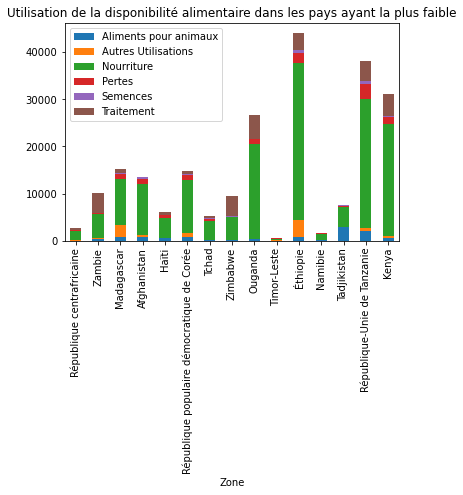

In [100]:
graphe_pays_faible_dispo_data=dispo_int_par_pays.sort_values('Disponibilité alimentaire (Kcal/personne/jour)')[['Aliments pour animaux','Autres Utilisations','Nourriture','Pertes','Semences','Traitement']].head(15)
graphe_pays_faible_dispo_data.plot(kind="bar", stacked=True)
plt.title("Utilisation de la disponibilité alimentaire dans les pays ayant la plus faible");

### Utilisation de la disponibilité intérieur dans les pays où elle est la plus forte

In [101]:
dispo_int_par_pays=disponibilite_2017.pivot_table(['Disponibilité alimentaire (Kcal/personne/jour)','Aliments pour animaux','Autres Utilisations','Nourriture','Pertes','Semences','Traitement'], ["Zone"], aggfunc='sum')
dispo_int_par_pays.sort_values('Disponibilité alimentaire (Kcal/personne/jour)', ascending=False)[['Aliments pour animaux','Autres Utilisations','Nourriture','Pertes','Semences','Traitement']].head(15)

,Aliments pour animaux,Autres Utilisations,Nourriture,Pertes,Semences,Traitement
Zone,,,,,,
Autriche,3412.0,1001.0,9085.0,459.0,173.0,5178.0
Belgique,5533.0,3226.0,11134.0,564.0,153.0,8960.0
Turquie,17750.0,3006.0,72551.0,12036.0,2553.0,23560.0
États-Unis d'Amérique,148432.0,154699.0,320889.0,7162.0,10403.0,141010.0
Israël,2525.0,801.0,7132.0,220.0,71.0,564.0
Irlande,3758.0,1120.0,5320.0,236.0,89.0,399.0
Italie,16144.0,3228.0,60584.0,1861.0,736.0,14870.0
Luxembourg,147.0,11.0,607.0,11.0,9.0,24.0
Égypte,15084.0,2262.0,65957.0,7608.0,1365.0,22924.0


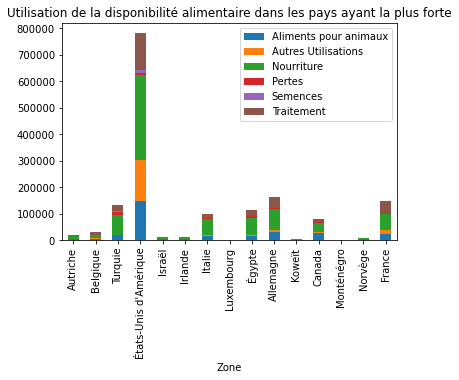

In [102]:
graphe_pays_forte_dispo_data=dispo_int_par_pays.sort_values('Disponibilité alimentaire (Kcal/personne/jour)', ascending=False)[['Aliments pour animaux','Autres Utilisations','Nourriture','Pertes','Semences','Traitement']].head(15)
graphe_pays_forte_dispo_data.plot(kind="bar", stacked=True)
plt.title("Utilisation de la disponibilité alimentaire dans les pays ayant la plus forte");

### Comment est utilisée la disponibilité mondiale de céréales

In [103]:
liste_cereales=['Avoine','Blé', 'Céréales, Autres','Maïs','Millet','Orge','Riz (Eq Blanchi)','Sésame','Seigle','Soja','Sorgho']

In [104]:
dispo_cereales_mondiale=disponibilite_2017.loc[disponibilite_2017['Produit'].isin(liste_cereales), ['Zone','Produit','Aliments pour animaux','Autres Utilisations','Nourriture','Pertes','Semences','Traitement']]
dispo_cereales_mondiale

,Zone,Produit,Aliments pour animaux,Autres Utilisations,Nourriture,Pertes,Semences,Traitement
7,Afghanistan,Blé,0.0,0.0,4895.0,775.0,322.0,0.0
12,Afghanistan,"Céréales, Autres",0.0,0.0,0.0,0.0,0.0,0.0
32,Afghanistan,Maïs,200.0,0.0,76.0,31.0,5.0,0.0
34,Afghanistan,Millet,0.0,0.0,12.0,1.0,0.0,0.0
40,Afghanistan,Orge,360.0,0.0,89.0,52.0,22.0,0.0
...,...,...,...,...,...,...,...,...
15575,Îles Salomon,Orge,0.0,0.0,0.0,0.0,0.0,1.0
15591,Îles Salomon,Riz (Eq Blanchi),0.0,12.0,36.0,1.0,0.0,0.0
15592,Îles Salomon,Soja,0.0,0.0,0.0,0.0,0.0,0.0
15593,Îles Salomon,Sorgho,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
graphe_cereale_data=dispo_cereales_mondiale.groupby('Produit').sum()
graphe_cereale_data

,Aliments pour animaux,Autres Utilisations,Nourriture,Pertes,Semences,Traitement
Produit,,,,,,
Avoine,16251.0,206.0,3849.0,514.0,2485.0,36.0
Blé,129602.0,22404.0,456221.0,27510.0,34283.0,7876.0
"Céréales, Autres",19034.0,1388.0,5288.0,785.0,1203.0,160.0
Maïs,542314.0,189356.0,124957.0,40656.0,6836.0,47490.0
Millet,3306.0,196.0,23035.0,2276.0,682.0,403.0
Orge,92651.0,654.0,6768.0,4628.0,8804.0,26817.0
Riz (Eq Blanchi),33529.0,18452.0,375882.0,27366.0,12184.0,6728.0
Seigle,8099.0,20.0,5502.0,562.0,1262.0,1120.0
Soja,17476.0,637.0,10232.0,3964.0,7401.0,225254.0


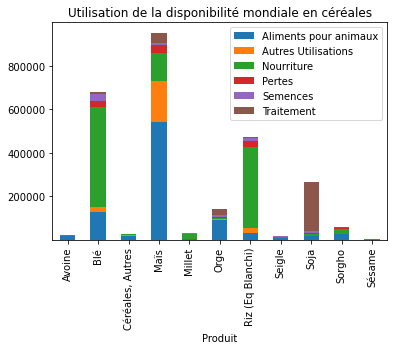

In [106]:
graphe_cereale_data.plot(kind="bar", stacked=True)
plt.title("Utilisation de la disponibilité mondiale en céréales");

In [107]:
graphe_cereale_data.sum()

Aliments pour animaux     886975.0
Autres Utilisations       235401.0
Nourriture               1037318.0
Pertes                    111174.0
Semences                   76005.0
Traitement                322037.0
dtype: float64

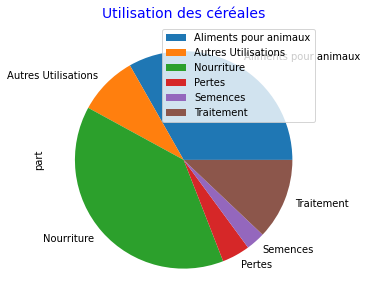

In [108]:
proportion_cereale=pd.DataFrame({'part': [886975.0,  235401.0,  1037318.0, 111174.0, 76005.0, 322037.0]},index=['Aliments pour animaux', 'Autres Utilisations', 'Nourriture', 'Pertes', 'Semences', 'Traitement'])
plot = proportion_cereale.plot.pie(y='part', figsize=(5,5))
plt.title("Utilisation des céréales", color='blue', fontsize=14);

### Production et utilisation du maïs

In [109]:
disponibilite_maïs=disponibilite_2017.loc[disponibilite_2017['Produit']=='Maïs',:].sort_values(['Production'], ascending=False)
disponibilite_maïs=disponibilite_maïs[['Zone','Produit', 'Aliments pour animaux','Autres Utilisations','Exportations - Quantité', 'Nourriture', 'Pertes','Semences', 'Traitement']]
disponibilite_maïs.head(15)

,Zone,Produit,Aliments pour animaux,Autres Utilisations,Exportations - Quantité,Nourriture,Pertes,Semences,Traitement
15391,États-Unis d'Amérique,Maïs,128024.0,137023.0,24655.0,3917.0,0.0,582.0,23230.0
3324,"Chine, continentale",Maïs,150000.0,35172.0,251.0,9391.0,10250.0,1650.0,6535.0
2130,Brésil,Maïs,40487.0,0.0,26780.0,5612.0,8145.0,386.0,108.0
750,Argentine,Maïs,4923.0,1266.0,20241.0,433.0,516.0,280.0,464.0
14386,Ukraine,Maïs,11393.0,14.0,16816.0,480.0,1235.0,242.0,827.0
6239,Inde,Maïs,6990.0,45.0,5119.0,7876.0,2330.0,946.0,0.0
9109,Mexique,Maïs,12615.0,30.0,719.0,14232.0,2858.0,370.0,1602.0
6335,Indonésie,Maïs,6000.0,4461.0,46.0,8820.0,1277.0,180.0,0.0
4890,France,Maïs,5200.0,582.0,6514.0,714.0,130.0,110.0,1485.0
2854,Canada,Maïs,10723.0,249.0,1945.0,667.0,452.0,16.0,1176.0


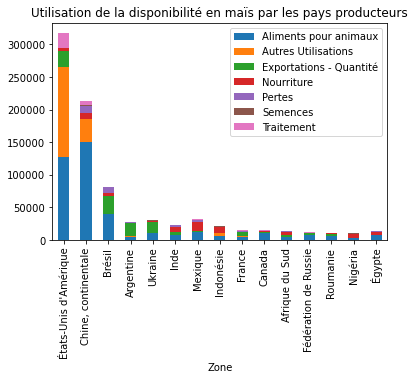

In [110]:
graphe_dispo_maïs_data=disponibilite_maïs.head(15)
graphe_dispo_maïs_data.plot(kind="bar", x="Zone", stacked=True)
plt.title("Utilisation de la disponibilité en maïs par les pays producteurs");

### Utilisation du maïs dans la pays en sous-nutrition

In [111]:
# on récupère à partir de la Q5, les pays où la proportion de personnes sous-alimentée est la plus forte.
liste_pays_sous_nutr = proportion_0NA.sort_values('pourcentage', ascending=False).head(15)

In [112]:
liste=liste_pays_sous_nutr['Zone'].unique()
dispo_pays_sous_nutr=disponibilite_2017[disponibilite_2017['Zone'].isin(liste)]
dispo_pays_sous_nutr

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14696,Venezuela (République bolivarienne du),Viande de Suides,animale,0.0,0.0,30.0,7.23,2.51,1.66,222.0,0.0,17.0,220.0,2.0,205.0,0.0,0.0,0.0
14697,Venezuela (République bolivarienne du),Viande de Volailles,animale,0.0,0.0,137.0,39.28,8.50,13.99,1194.0,0.0,279.0,1194.0,0.0,915.0,0.0,0.0,0.0
14698,Venezuela (République bolivarienne du),"Viande, Autre",animale,0.0,0.0,0.0,0.05,0.01,0.03,2.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0
14699,Venezuela (République bolivarienne du),Vin,vegetale,0.0,0.0,1.0,0.35,0.00,0.00,11.0,0.0,11.0,11.0,0.0,0.0,0.0,0.0,0.0


In [113]:
dispo_pays_sous_nutr.loc[(dispo_pays_sous_nutr['Produit']=='Maïs')][['Zone','Produit', 'Aliments pour animaux','Autres Utilisations','Exportations - Quantité', 'Nourriture', 'Pertes','Semences', 'Traitement']]

,Zone,Produit,Aliments pour animaux,Autres Utilisations,Exportations - Quantité,Nourriture,Pertes,Semences,Traitement
32,Afghanistan,Maïs,200.0,0.0,0.0,76.0,31.0,5.0,0.0
3605,Congo,Maïs,0.0,0.0,0.0,16.0,1.0,0.0,0.0
5960,Haïti,Maïs,20.0,0.0,0.0,239.0,17.0,12.0,0.0
6515,Iraq,Maïs,800.0,0.0,0.0,10.0,25.0,8.0,0.0
7673,Lesotho,Maïs,0.0,0.0,9.0,329.0,20.0,3.0,2.0
7926,Libéria,Maïs,16.0,0.0,0.0,0.0,0.0,0.0,0.0
8285,Madagascar,Maïs,21.0,0.0,2.0,412.0,27.0,8.0,0.0
9377,Mozambique,Maïs,358.0,0.0,7.0,1410.0,93.0,34.0,0.0
11593,Rwanda,Maïs,0.0,0.0,15.0,169.0,73.0,9.0,0.0
12090,République populaire démocratique de Corée,Maïs,118.0,250.0,0.0,1140.0,159.0,37.0,398.0


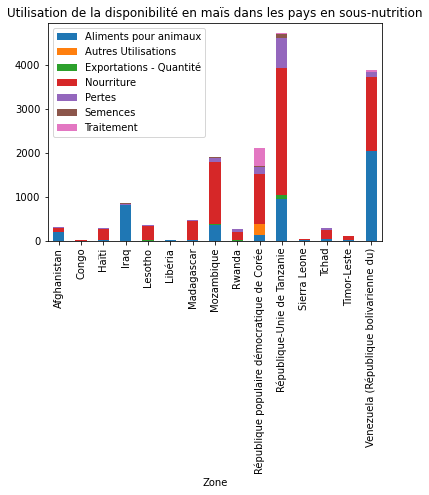

In [114]:
graphe_maïs_pays_sous_nutri_data=dispo_pays_sous_nutr.loc[(dispo_pays_sous_nutr['Produit']=='Maïs')][['Zone','Produit', 'Aliments pour animaux','Autres Utilisations','Exportations - Quantité', 'Nourriture', 'Pertes','Semences', 'Traitement']].head(15)
graphe_maïs_pays_sous_nutri_data.plot(kind="bar", x="Zone", stacked=True)
plt.title("Utilisation de la disponibilité en maïs dans les pays en sous-nutrition");

### Comment est utilisée la disponibilité mondiale de féculents

In [115]:
liste_feculents=['Pommes de Terre','Haricots','Ignames','Manioc','Patates douces','Pois']

In [116]:
dispo_feculents_mondiale=disponibilite_2017.loc[disponibilite_2017['Produit'].isin(liste_feculents), ['Zone','Produit','Aliments pour animaux','Autres Utilisations','Nourriture','Pertes','Semences','Traitement']]
dispo_feculents_mondiale

,Zone,Produit,Aliments pour animaux,Autres Utilisations,Nourriture,Pertes,Semences,Traitement
45,Afghanistan,Pommes de Terre,0.0,0.0,230.0,9.0,23.0,0.0
91,Afrique du Sud,Haricots,0.0,0.0,96.0,3.0,5.0,0.0
106,Afrique du Sud,Ignames,0.0,0.0,0.0,0.0,0.0,0.0
110,Afrique du Sud,Manioc,0.0,57.0,0.0,0.0,0.0,0.0
124,Afrique du Sud,Patates douces,3.0,0.0,59.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
15563,Îles Salomon,Ignames,0.0,0.0,44.0,1.0,0.0,0.0
15567,Îles Salomon,Manioc,0.0,0.0,3.0,0.0,0.0,0.0
15578,Îles Salomon,Patates douces,0.0,0.0,98.0,2.0,0.0,0.0
15582,Îles Salomon,Pois,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
graphe_feculents_data=dispo_feculents_mondiale.groupby('Produit').sum()
graphe_feculents_data

,Aliments pour animaux,Autres Utilisations,Nourriture,Pertes,Semences,Traitement
Produit,,,,,,
Haricots,2672.0,59.0,17367.0,1238.0,1227.0,0.0
Ignames,4913.0,16276.0,32511.0,6764.0,2209.0,0.0
Manioc,87051.0,34670.0,100625.0,30536.0,0.0,2459.0
Patates douces,35161.0,58.0,56948.0,6425.0,592.0,47.0
Pois,3389.0,28.0,5809.0,421.0,838.0,0.0
Pommes de Terre,47242.0,10448.0,238729.0,35452.0,32201.0,12885.0


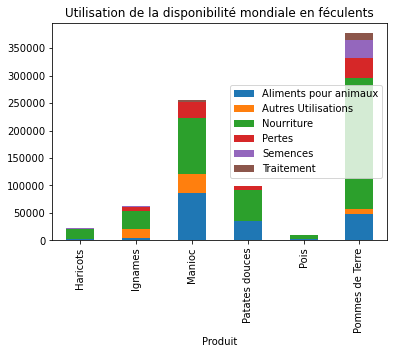

In [118]:
graphe_feculents_data.plot(kind="bar", stacked=True)
plt.title("Utilisation de la disponibilité mondiale en féculents");

In [119]:
disponibilite_manioc=disponibilite_2017.loc[disponibilite_2017['Produit']=='Manioc',:].sort_values(['Production'], ascending=False)
disponibilite_manioc=disponibilite_manioc[['Zone','Produit', 'Aliments pour animaux','Autres Utilisations','Exportations - Quantité', 'Nourriture', 'Pertes','Semences', 'Traitement']]
disponibilite_manioc.head(15)

,Zone,Produit,Aliments pour animaux,Autres Utilisations,Exportations - Quantité,Nourriture,Pertes,Semences,Traitement
9830,Nigéria,Manioc,26288.0,0.0,11.0,20636.0,6080.0,0.0,0.0
13809,Thaïlande,Manioc,1800.0,2081.0,25214.0,871.0,1511.0,0.0,0.0
6334,Indonésie,Manioc,480.0,8894.0,820.0,11735.0,3110.0,0.0,0.0
2129,Brésil,Manioc,10684.0,1196.0,38.0,7275.0,2123.0,0.0,0.0
475,Angola,Manioc,8880.0,0.0,0.0,4249.0,3282.0,0.0,0.0
5255,Ghana,Manioc,4020.0,1566.0,9.0,5598.0,4800.0,0.0,0.0
9376,Mozambique,Manioc,1350.0,2100.0,0.0,5850.0,700.0,0.0,0.0
14743,Viet Nam,Manioc,698.0,0.0,8973.0,742.0,488.0,0.0,0.0
2665,Cambodge,Manioc,0.0,6562.0,254.0,383.0,800.0,0.0,0.0
6238,Inde,Manioc,0.0,0.0,21.0,6933.0,362.0,0.0,0.0


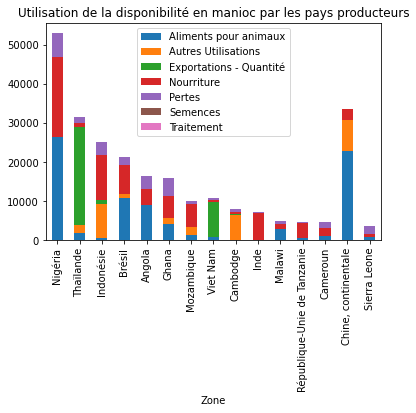

In [120]:
graphe_dispo_manioc_data=disponibilite_manioc.head(15)
graphe_dispo_manioc_data.plot(kind="bar", x="Zone", stacked=True)
plt.title("Utilisation de la disponibilité en manioc par les pays producteurs");

### Comment est utilisée la disponibilité mondiale en arachide

In [121]:
dispo_arachide_mondiale=disponibilite_2017.loc[disponibilite_2017['Produit']=='Arachides Decortiquees', ['Zone','Produit','Aliments pour animaux','Autres Utilisations','Nourriture','Pertes','Semences','Traitement']]
graphe_arachide_data=dispo_arachide_mondiale.groupby('Zone').sum().sort_values('Nourriture', ascending=False).head(15)
graphe_arachide_data




,Aliments pour animaux,Autres Utilisations,Nourriture,Pertes,Semences,Traitement
Zone,,,,,,
"Chine, continentale",0.0,0.0,5355.0,476.0,292.0,5285.0
Indonésie,0.0,0.0,1081.0,58.0,8.0,82.0
États-Unis d'Amérique,0.0,0.0,982.0,0.0,88.0,208.0
Inde,0.0,0.0,445.0,199.0,255.0,3093.0
Nigéria,0.0,125.0,352.0,143.0,116.0,1374.0
République-Unie de Tanzanie,0.0,210.0,268.0,27.0,23.0,17.0
Viet Nam,0.0,0.0,250.0,17.0,9.0,66.0
Burkina Faso,0.0,0.0,179.0,10.0,22.0,20.0
Cameroun,0.0,0.0,161.0,82.0,25.0,178.0


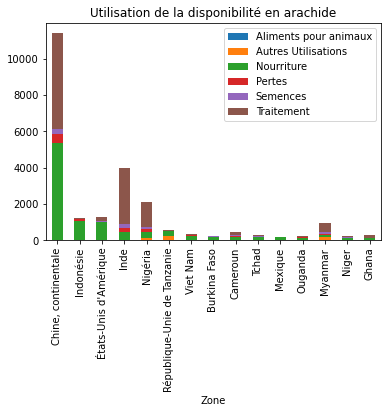

In [122]:
graphe_arachide_data.plot(kind="bar", stacked=True)
plt.title("Utilisation de la disponibilité en arachide");

### Comment est utilisée la disponibilité mondiale viande

In [123]:
liste_viande=["Abats Comestible","Viande d'Ovins/Caprins",'Viande de Bovins', 'Viande de Volailles','Viande, Autre','Viande de Suides']

In [124]:
dispo_viande_mondiale=disponibilite_2017.loc[disponibilite_2017['Produit'].isin(liste_viande), ['Zone','Produit','Nourriture', 'Production','Exportations - Quantité']]
graphe_viande_data=dispo_viande_mondiale.groupby('Zone').sum().sort_values('Nourriture', ascending=False).head(15)
graphe_viande_data

,Nourriture,Production,Exportations - Quantité
Zone,,,
"Chine, continentale",89363.0,87432.0,910.0
États-Unis d'Amérique,36991.0,44225.0,8294.0
Brésil,20017.0,27238.0,6998.0
Fédération de Russie,11389.0,9100.0,141.0
Mexique,8237.0,6531.0,304.0
Allemagne,7171.0,8845.0,4213.0
Japon,6635.0,3552.0,15.0
France,5956.0,5983.0,1689.0
Viet Nam,5447.0,4648.0,10.0


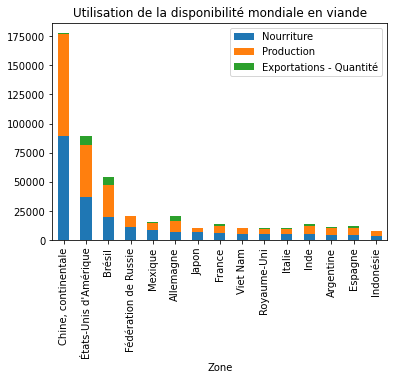

In [125]:
graphe_viande_data.plot(kind="bar", stacked=True)
plt.title("Utilisation de la disponibilité mondiale en viande");

### Etude des exportations des pays en sous-nutrition

In [126]:
export_pays_sous_nutri=dispo_pays_sous_nutr.loc[(dispo_pays_sous_nutr['Exportations - Quantité']>10), ['Zone', 'Produit','Disponibilité intérieure','Nourriture','Exportations - Quantité']].copy()
export_pays_sous_nutri['Proportion alim humaine']=round(export_pays_sous_nutri['Nourriture']/export_pays_sous_nutri['Disponibilité intérieure']*100,2)

In [127]:
export_pays_sous_nutri.sort_values('Exportations - Quantité', ascending=False).head(15)

,Zone,Produit,Disponibilité intérieure,Nourriture,Exportations - Quantité,Proportion alim humaine
9406,Mozambique,Sucre Eq Brut,287.0,287.0,173.0,100.00
12175,République-Unie de Tanzanie,Noix,26.0,24.0,172.0,92.31
6489,Iraq,Dattes,532.0,230.0,145.0,43.23
12201,République-Unie de Tanzanie,Sucre Eq Brut,468.0,468.0,131.0,100.00
11589,Rwanda,Lait - Excl Beurre,96.0,85.0,130.0,88.54
12167,République-Unie de Tanzanie,"Légumes, Autres",1887.0,1705.0,122.0,90.36
12188,République-Unie de Tanzanie,Pois,11.0,0.0,120.0,0.00
12131,République-Unie de Tanzanie,Blé,814.0,785.0,107.0,96.44
46,Afghanistan,Raisin,513.0,483.0,97.0,94.15
12170,République-Unie de Tanzanie,Maïs,4614.0,2880.0,91.0,62.42


# CONCLUSION

### *Calcul de la proportion de personne en sous-nutrition*
> La proportion de personnes en état de sous-nutrition est de : 7.11 %

### *Nombre théorique de personnes pouvant être nourries*
> Nombre théorique de personnes pouvant être nourries : 10 411 092 465 habitants

### *Nombre théorique de personnes pouvant être nourries en produits végétaux*
> Nombre théorique de personnes pouvant être nourries : 8 594 840 212 habitants

### *Utilisation de la disponibilité intérieure*
> * 13.23 % de la disponibilité intérieure est attribuée à l'alimentation animale
> * 49.46 % de la disponibilité intérieure est utilisée pour à l'alimentation humaine.
> * 4.61 % de la disponibilité intérieure est perdue.
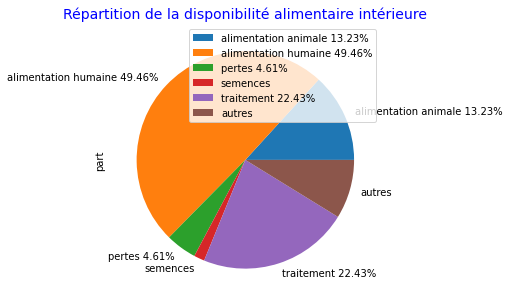


### *Pays où la proportion de personnes sous alimentées est la plus forte*
> 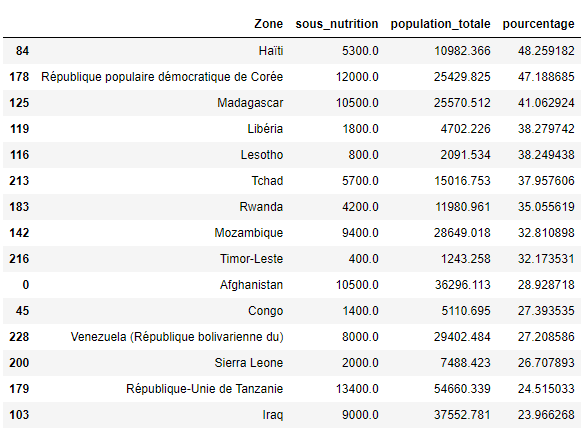


> 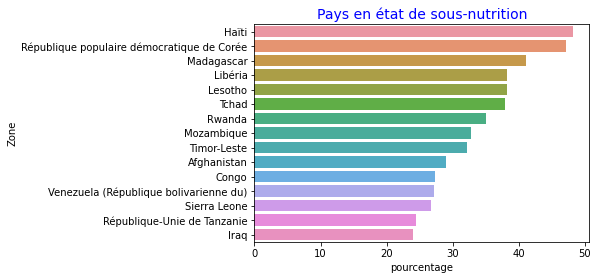

### *Pays ayant reçus le plus d'aide depuis 2013*
> 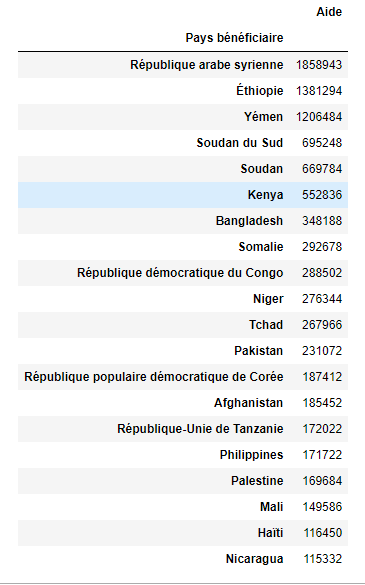


### *Pays ayant le plus / le moins de disponibilité alimentaire*
> 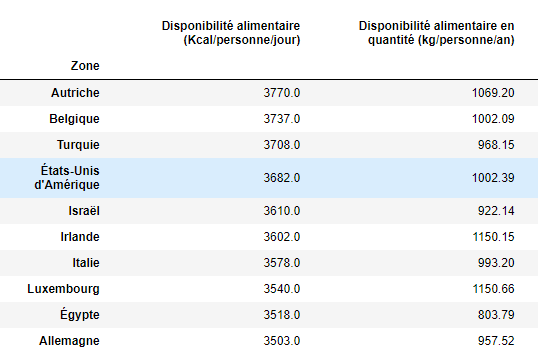

> 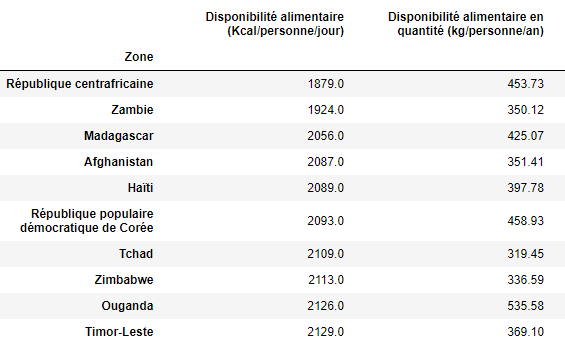

### *Indicateurs des pays les plus en difficulté*
On admet que les apports journaliers **moyens** sont de 2500 kcal/jour en moyenne
> * 42 pays sur 233 ont un déficit alimentaire
> 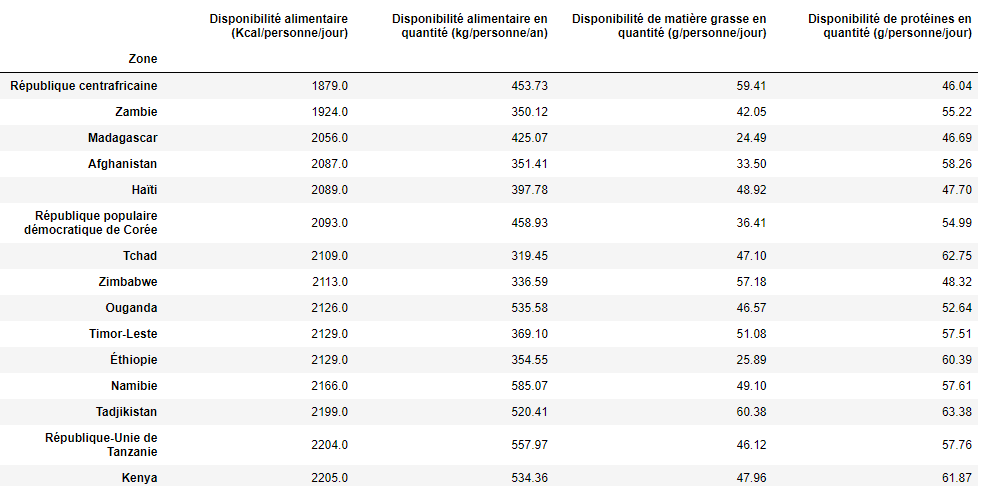

On admet que les apports journaliers **minimums** sont de 2000 kcal/jour en moyenne
L'équilibre alimentaire se décompose comme suit :
* 15% de protéines apportant 300 kcal soit 75g
* 50% de glucides apportant 1000 kcal soit 250g
* 35% de lipides apportant 700 kcal soit 78g

> * 72 pays sur 233 ont une disponibilité journalière en protéines insuffisante
> 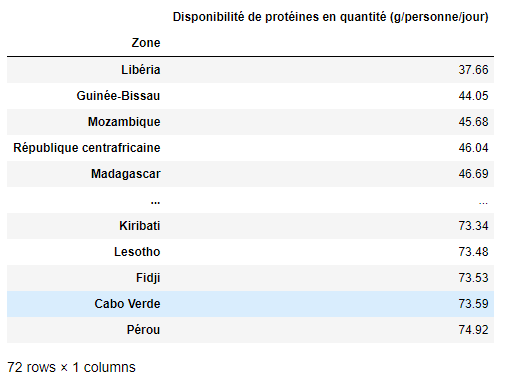

> * 80 pays sur 233 ont une disponibilité journalière en matière grasse insuffisante
> 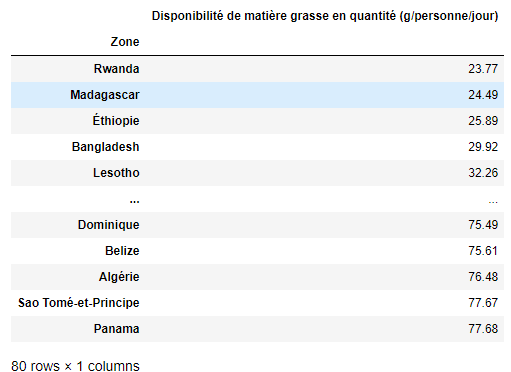

### *Utilisation de la disponibilité alimentaire*
> 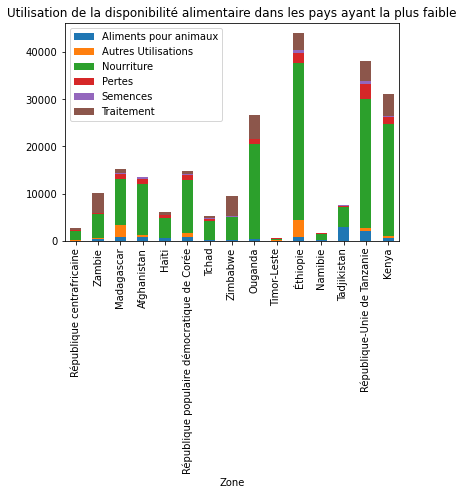
> La disponibilité alimentaire est utilisée essentiellement pour l'alimentation humaine
> 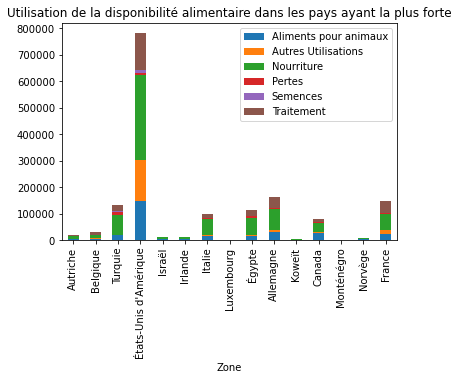
> On constate que dans le pays disposant de la plus grande disponibilité alimentaire, les Etats-Unis seule la moitié est utilisée pour l'alimentation humaine, une proportion importante est utilisée pour l'alimentation animale.
> ### *Cas des céréales*
> 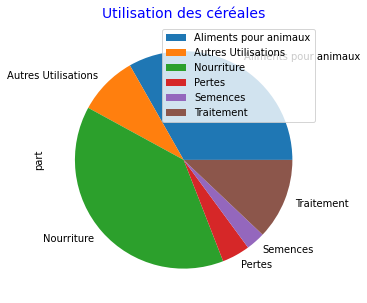
> Si globalement les céréales sont largement utilisées pour l'alimentation humaine, on constate qu'une proportion importante est consacrée à l'alimentation animale, c'est le cas majoritairement du maïs.
> 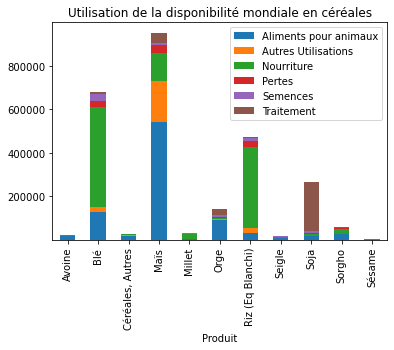
> ### *Production et utilisation du maïs*
> 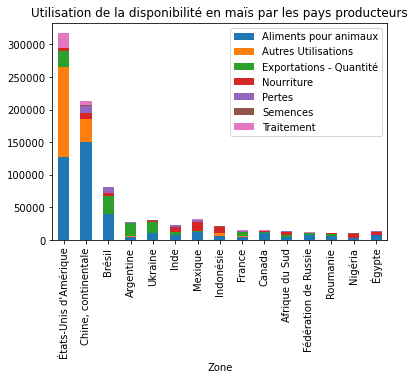
A l'exception de l'indonésie, du mexique et de l'inde, les pays producteurs utilisent le maïs pour l'alimentation animale et sa transformation. Une grande partie de cette production pourrait pourrait être affectée à l'alimentation humaine des pays en sous-nutrition, en réduisant l'élevage.
> 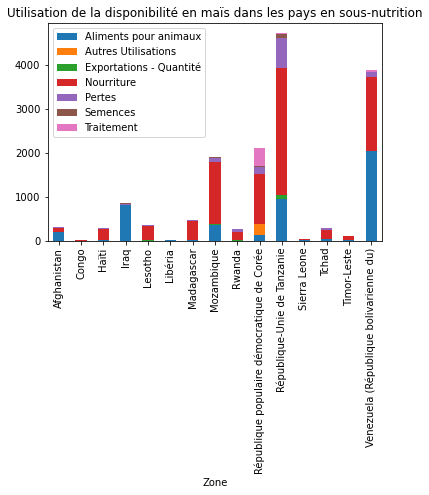
> ### *Cas des féculents*
> 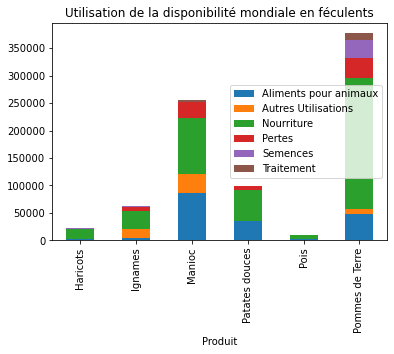
> Globalement les féculents sont destinés pour l'alimenation humaine. En revanche, il apparaît qu'une grande partie du manioc disponible est consacré à l'alimentation animale.
> ### *Production et utilisation du manioc*
> 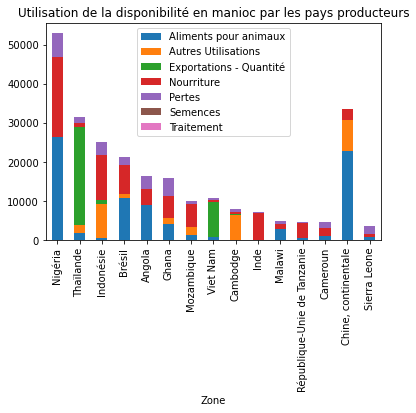
> La thaïlande est le 1er produit exportateur de manioc, il est utilisé dans les pays industriel comme source d'amidon.